In [1]:
import pandas as pd
import geopandas as gpd
import gtfstk as gt
from shapely.ops import split, snap
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
OTP_6_15_6_21=pd.read_csv(r"\\VRIDE-FS2\Development\Planning - New File Structure\Performance\FY19 OTP\OTP_RITA_6_15_6_21_19.csv")
feed=gt.read_gtfs(r"N:\Planning - New File Structure\GIS\Data\OFFICIAL CURRENT\GTFS\VRT_Transit1.zip",dist_units='mi')
RITA=gpd.read_file(r"N:\Planning - New File Structure\GIS\Data\Transportation\RITA\RITA_6_17_19\Rita.shp")
RITA=RITA.loc[(RITA['SYMBOL']=='L/R')|(RITA['SYMBOL']=='Closure')]
RITA=RITA.to_crs({'init' :'epsg:4326'})
centerline=gpd.read_file(r"N:\Planning - New File Structure\GIS\Data\Transportation\Centerline\Centerline\CenterlineOutput.gdb")
centerline=centerline.to_crs({'init' :'epsg:4326'})

In [3]:
routes=gt.geometrize_shapes(feed.shapes)
routes=routes.merge(feed.trips, how='right')
routes=routes.merge(feed.routes)
routes=routes.loc[(routes['route_short_name']!='51')&(routes['route_short_name']!='52')&(routes['route_short_name']!='55')]
routes=gpd.sjoin(routes, RITA,how='left',op='intersects')
routes.head(50)

,shape_id,geometry,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,agency_id,route_short_name,...,CONTRACTOR,TYPE,PRJ_NO,Group_,INSPECTOR,PROJECTSTA,Shape_STLe,Shape_ST_1,PermitNo,Shape_ST_2
0,shape_VRT_6127,LINESTRING (-116.2037175893784 43.615189875022...,route_VRT_2376,service_VRT_2112984,1_16:45_Weekday_78352,NaN,0,5220,VRT,1,...,"Zayo, Circle H Construction",Lane Restrictions w/Flagging,60.0,Current Projects,Gabe A,None,0.0,0.0,Zone19-1281,323.007596
0,shape_VRT_6127,LINESTRING (-116.2037175893784 43.615189875022...,route_VRT_2376,service_VRT_2112984,1_16:45_Weekday_78352,NaN,0,5220,VRT,1,...,"Cable One, Broadband Tech",Lane Restrictions w/Flagging,134.0,Current Projects,Gabe A,None,0.0,0.0,Zone19-0529,516.031320
0,shape_VRT_6127,LINESTRING (-116.2037175893784 43.615189875022...,route_VRT_2376,service_VRT_2112984,1_16:45_Weekday_78352,NaN,0,5220,VRT,1,...,"Diamond Contractors, Power Plus",Lane Restrictions w/Flagging,166.0,Current Projects,Gabe A,None,0.0,0.0,Zone19-1403,473.375307
0,shape_VRT_6127,LINESTRING (-116.2037175893784 43.615189875022...,route_VRT_2376,service_VRT_2112984,1_16:45_Weekday_78352,NaN,0,5220,VRT,1,...,Andersen Construction,Lane & Pedestrian Restrictions,63.0,Current Projects,Bryant H,None,0.0,0.0,Zone18-0343,803.317330
0,shape_VRT_6127,LINESTRING (-116.2037175893784 43.615189875022...,route_VRT_2376,service_VRT_2112984,1_16:45_Weekday_78352,NaN,0,5220,VRT,1,...,"Boise City, Titan",Lane Restrictions,66.0,Current Projects,Bryant H,None,0.0,0.0,Zone19-1823,356.506706
0,shape_VRT_6127,LINESTRING (-116.2037175893784 43.615189875022...,route_VRT_2376,service_VRT_2112984,1_16:45_Weekday_78352,NaN,0,5220,VRT,1,...,City of Boise,Lane Restrictions,187.0,Current Projects,Bryant H,None,0.0,0.0,EMERGENCY,682.418182
1,shape_VRT_6127,LINESTRING (-116.2037175893784 43.615189875022...,route_VRT_2376,service_VRT_2112984,1_07:45_Weekday_78334,NaN,0,5000,VRT,1,...,"Zayo, Circle H Construction",Lane Restrictions w/Flagging,60.0,Current Projects,Gabe A,None,0.0,0.0,Zone19-1281,323.007596
1,shape_VRT_6127,LINESTRING (-116.2037175893784 43.615189875022...,route_VRT_2376,service_VRT_2112984,1_07:45_Weekday_78334,NaN,0,5000,VRT,1,...,"Cable One, Broadband Tech",Lane Restrictions w/Flagging,134.0,Current Projects,Gabe A,None,0.0,0.0,Zone19-0529,516.031320
1,shape_VRT_6127,LINESTRING (-116.2037175893784 43.615189875022...,route_VRT_2376,service_VRT_2112984,1_07:45_Weekday_78334,NaN,0,5000,VRT,1,...,"Diamond Contractors, Power Plus",Lane Restrictions w/Flagging,166.0,Current Projects,Gabe A,None,0.0,0.0,Zone19-1403,473.375307
1,shape_VRT_6127,LINESTRING (-116.2037175893784 43.615189875022...,route_VRT_2376,service_VRT_2112984,1_07:45_Weekday_78334,NaN,0,5000,VRT,1,...,Andersen Construction,Lane & Pedestrian Restrictions,63.0,Current Projects,Bryant H,None,0.0,0.0,Zone18-0343,803.317330


In [4]:
OTP_6_15_6_21=OTP_6_15_6_21[['MasterRouteName','TripName','MinutesEarly','MinutesLate']]
OTP_6_15_6_21['Count']=1
OTP_6_15_6_21['Early']=OTP_6_15_6_21['MinutesEarly']>0
OTP_6_15_6_21['On Time']=(OTP_6_15_6_21['MinutesEarly']==0)&(OTP_6_15_6_21['MinutesLate']==0)
OTP_6_15_6_21['Late']=OTP_6_15_6_21['MinutesLate']>0

In [5]:
affected=routes[['trip_id','SYMBOL']]
affected.head()

,trip_id,SYMBOL
0,1_16:45_Weekday_78352,L/R
0,1_16:45_Weekday_78352,L/R
0,1_16:45_Weekday_78352,L/R
0,1_16:45_Weekday_78352,L/R
0,1_16:45_Weekday_78352,L/R


In [6]:
byTrip=OTP_6_15_6_21.groupby(['MasterRouteName','TripName']).sum()
byTrip=byTrip[['Count','Early','On Time','Late']]
byTrip['Percent']=byTrip['On Time']/byTrip['Count']
byTrip.reset_index(inplace=True)
byTrip

,MasterRouteName,TripName,Count,Early,On Time,Late,Percent
0,BSU Express,45_09:00_Weekday_79178,12,0.0,11.0,1.0,0.916667
1,BSU Express,45_09:28_Weekday_79183,16,0.0,14.0,2.0,0.875000
2,BSU Express,45_10:15_Weekday_79179,11,0.0,8.0,3.0,0.727273
3,BSU Express,45_10:43_Weekday_79184,16,0.0,16.0,0.0,1.000000
4,BSU Express,45_13:00_Weekday_79180,15,0.0,13.0,2.0,0.866667
5,BSU Express,45_13:28_Weekday_79185,15,0.0,8.0,7.0,0.533333
6,BSU Express,45_14:15_Weekday_79181,10,0.0,9.0,1.0,0.900000
7,BSU Express,45_14:43_Weekday_79186,13,0.0,9.0,4.0,0.692308
8,BSU Express,45_16:00_Weekday_79182,13,1.0,6.0,6.0,0.461538
9,BSU Express,45_16:28_Weekday_79187,15,0.0,7.0,8.0,0.466667


In [7]:
routes2=gt.geometrize_shapes(feed.shapes)
test_line=routes2.iloc[[0]]
test_line.head()

,shape_id,geometry
0,shape_VRT_6127,LINESTRING (-116.2037175893784 43.615189875022...


In [8]:
stops=gt.geometrize_stops(feed.stops)
stops=stops.merge(feed.stop_times,how='right')
stops=stops.merge(feed.trips)
stops=stops.merge(feed.routes)
test_stops=stops.loc[stops['shape_id']=='shape_VRT_6127']
test_stops=test_stops.groupby('stop_id').first()
test_stops.reset_index(inplace=True)
test_stops.sort_values('stop_sequence',inplace=True)
test_stops

,stop_id,stop_code,stop_name,stop_desc,zone_id,geometry,trip_id,arrival_time,departure_time,stop_sequence,...,block_id,shape_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
18,01019999,NaN,Main Street Station,NaN,zoneforstop_VRT_3308,POINT (-116.2035299242798 43.61516457218522),1_06:45_Weekday_78332,06:45:00,06:45:00,0,...,5220,shape_VRT_6127,VRT,1,Harris Ranch via Parkcenter,NaN,3,NaN,ffcd00,000000
2,01010126,NaN,9th & River SWC,NaN,zoneforstop_VRT_2923,POINT (-116.2093258674151 43.61088085380441),1_06:45_Weekday_78332,NaN,NaN,1,...,5220,shape_VRT_6127,VRT,1,Harris Ranch via Parkcenter,NaN,3,NaN,ffcd00,000000
3,01010147,NaN,9th & Royal NWC,NaN,zoneforstop_VRT_377,POINT (-116.2098124360456 43.60869059139682),1_06:45_Weekday_78332,NaN,NaN,2,...,5220,shape_VRT_6127,VRT,1,Harris Ranch via Parkcenter,NaN,3,NaN,ffcd00,000000
4,01010154,NaN,University & Earle SWC,NaN,zoneforstop_VRT_3321,POINT (-116.2097307292881 43.60493488423648),1_06:45_Weekday_78332,NaN,NaN,3,...,5220,shape_VRT_6127,VRT,1,Harris Ranch via Parkcenter,NaN,3,NaN,ffcd00,000000
5,01010157,NaN,University & Joyce SEC,NaN,zoneforstop_VRT_2906,POINT (-116.2042123809369 43.60269923437176),1_06:45_Weekday_78332,06:50:00,06:50:00,4,...,5220,shape_VRT_6127,VRT,1,Harris Ranch via Parkcenter,NaN,3,NaN,ffcd00,000000
15,01010638,NaN,Beacon & Manitou SWC,NaN,zoneforstop_VRT_47,POINT (-116.1987372011365 43.59832888786902),1_06:45_Weekday_78332,NaN,NaN,5,...,5220,shape_VRT_6127,VRT,1,Harris Ranch via Parkcenter,NaN,3,NaN,ffcd00,000000
14,01010635,NaN,Beacon & Broadway SWC,NaN,zoneforstop_VRT_51,POINT (-116.1937602605844 43.59829999991),1_06:45_Weekday_78332,06:52:00,06:52:00,6,...,5220,shape_VRT_6127,VRT,1,Harris Ranch via Parkcenter,NaN,3,NaN,ffcd00,000000
6,01010427,NaN,Beacon & Parkcenter SWC,NaN,zoneforstop_VRT_53,POINT (-116.1872152648179 43.59857804162264),1_06:45_Weekday_78332,NaN,NaN,7,...,5220,shape_VRT_6127,VRT,1,Harris Ranch via Parkcenter,NaN,3,NaN,ffcd00,000000
7,01010429,NaN,Parkcenter & Mallard SWC,NaN,zoneforstop_VRT_55,POINT (-116.1781249402949 43.5966226438217),1_06:45_Weekday_78332,NaN,NaN,8,...,5220,shape_VRT_6127,VRT,1,Harris Ranch via Parkcenter,NaN,3,NaN,ffcd00,000000
8,01010433,NaN,Parkcenter & River Run NWC,NaN,zoneforstop_VRT_57,POINT (-116.1746290793722 43.5894491823253),1_06:45_Weekday_78332,NaN,NaN,9,...,5220,shape_VRT_6127,VRT,1,Harris Ranch via Parkcenter,NaN,3,NaN,ffcd00,000000


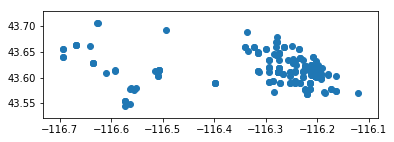

In [9]:
stops2=gt.geometrize_stops(feed.stops)
stops2=stops2.merge(feed.stop_times,how='right')
stops2=stops2.merge(feed.trips)
stops2=stops2.merge(feed.routes)
stops2=stops2.groupby(['stop_id','route_id']).first()
stops2=gpd.GeoDataFrame(stops2)
timepoints=stops2.loc[stops2['departure_time'].notna()]
timepoints=gpd.GeoDataFrame(timepoints)
timepoints.plot()

In [10]:
def split_line_by_nearest_points(gdf_line, gdf_points, tolerance):
    global gdf_segments
    # union all geometries
    line = gdf_line.geometry.unary_union
    coords = gdf_points.geometry.unary_union

    # snap and split coords on line
    # returns GeometryCollection
    split_line = split(line, snap(coords, line, tolerance))

    # transform Geometry Collection to GeoDataFrame
    segments = [feature for feature in split_line]

    gdf_segments = gpd.GeoDataFrame(
        list(range(len(segments))), geometry=segments,crs={'init' :'epsg:4326'})
    gdf_segments.columns = ['index', 'geometry']
    fig, ax = plt.subplots()
    test_line.plot(ax=ax, lw=6, color='gray')
    gdf_segments.plot(ax=ax, column='index', lw=3, cmap='Paired')
    gdf_points.plot(ax=ax, zorder=3)
    return gdf_segments

,index,geometry
0,0,"LINESTRING (-116.55659 43.57519000000001, -116..."
1,1,"LINESTRING (-116.55618 43.57550000000001, -116..."
2,2,"LINESTRING (-116.55561 43.57595999999999, -116..."
3,3,"LINESTRING (-116.55512 43.57633000000001, -116..."
4,4,"LINESTRING (-116.55463 43.5767, -116.5542 43.5..."
5,5,"LINESTRING (-116.5542 43.57703, -116.554 43.57..."
6,6,"LINESTRING (-116.554 43.57717, -116.55338 43.5..."
7,7,"LINESTRING (-116.55323 43.57779, -116.55322 43..."
8,8,"LINESTRING (-116.55322 43.5778, -116.55316 43...."
9,9,"LINESTRING (-116.55316 43.57784, -116.55274 43..."


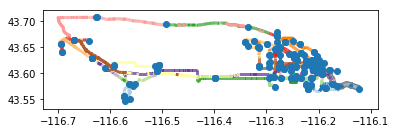

In [11]:
split_line_by_nearest_points(routes2,timepoints,1)

In [12]:
gdf_segments=gpd.sjoin(gdf_segments,routes2)
gdf_segments.drop('index_right',inplace=True,axis=1)

c:\users\bparker\appdata\local\conda\conda\envs\py3\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: divide by zero encountered in ? (vectorized)
  outputs = ufunc(*inputs)


In [13]:
gdf_segments=gpd.sjoin(gdf_segments,RITA)
gdf_segments.drop('index_right',inplace=True,axis=1)

In [14]:
gdf_segments=gdf_segments.merge(feed.trips)
gdf_segments=gdf_segments.merge(feed.routes)
gdf_segments.head()

,index,geometry,shape_id,SYMBOL,ROADWAY,LOCATION,START,FINISH,CITY,PURPOSE,...,direction_id,block_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,277,"LINESTRING (-116.18211 43.56826, -116.18227 43...",shape_VRT_6129,L/R,Federal Way,at Gekeler Ln,2019-06-10,2019-06-21,Boise,Manhole Access,...,0,7020,VRT,2,Broadway,NaN,3,NaN,685bc7,000000
1,277,"LINESTRING (-116.18211 43.56826, -116.18227 43...",shape_VRT_6129,L/R,Federal Way,at Gekeler Ln,2019-06-10,2019-06-21,Boise,Manhole Access,...,0,7020,VRT,2,Broadway,NaN,3,NaN,685bc7,000000
2,277,"LINESTRING (-116.18211 43.56826, -116.18227 43...",shape_VRT_6129,L/R,Federal Way,at Gekeler Ln,2019-06-10,2019-06-21,Boise,Manhole Access,...,0,7020,VRT,2,Broadway,NaN,3,NaN,685bc7,000000
3,277,"LINESTRING (-116.18211 43.56826, -116.18227 43...",shape_VRT_6129,L/R,Federal Way,at Gekeler Ln,2019-06-10,2019-06-21,Boise,Manhole Access,...,0,5370,VRT,2,Broadway,NaN,3,NaN,685bc7,000000
4,277,"LINESTRING (-116.18211 43.56826, -116.18227 43...",shape_VRT_6129,L/R,Federal Way,at Gekeler Ln,2019-06-10,2019-06-21,Boise,Manhole Access,...,0,5340,VRT,2,Broadway,NaN,3,NaN,685bc7,000000


In [15]:
byRoute=byTrip.groupby('MasterRouteName')[['Count','Early','On Time','Late']].sum()
byRoute['Percent']=byRoute['On Time']/byRoute['Count']
byRoute.reset_index(inplace=True)
byRoute=byRoute.merge(gdf_segments,left_on='MasterRouteName',right_on='route_long_name',how='left')
byRoute=byRoute[['route_short_name','route_long_name','Count','Early','On Time','Late','Percent','SYMBOL']]
byRoute=byRoute.groupby(['route_short_name','route_long_name']).first()
byRoute

,,Count,Early,On Time,Late,Percent,SYMBOL
route_short_name,route_long_name,,,,,,
1,Harris Ranch via Parkcenter,799,24.0,424.0,351.0,0.530663,L/R
11,Garden City,225,11.0,192.0,22.0,0.853333,L/R
12,Maple Grove,909,6.0,679.0,224.0,0.746975,Closure
16,VA/Hyde Park Loop,367,7.0,196.0,164.0,0.534060,L/R
17,Warm Springs,489,2.0,392.0,95.0,0.801636,L/R
2,Broadway,1035,8.0,825.0,202.0,0.797101,L/R
28,Cole/Victory,430,45.0,348.0,37.0,0.809302,L/R
29,Overland,1018,21.0,757.0,240.0,0.743615,L/R
3,Vista,1954,9.0,1606.0,339.0,0.821904,L/R
